
# <span style="color:rgb(213,80,0)">Mandible Length data.</span>

This file creates Figure 6.17.

## Beginning of code

In [1]:
load mandible.mat
% Define X and y
X=mandible{:,1};
y=mandible{:,2};
prin=0;

## Create Figure 6.17


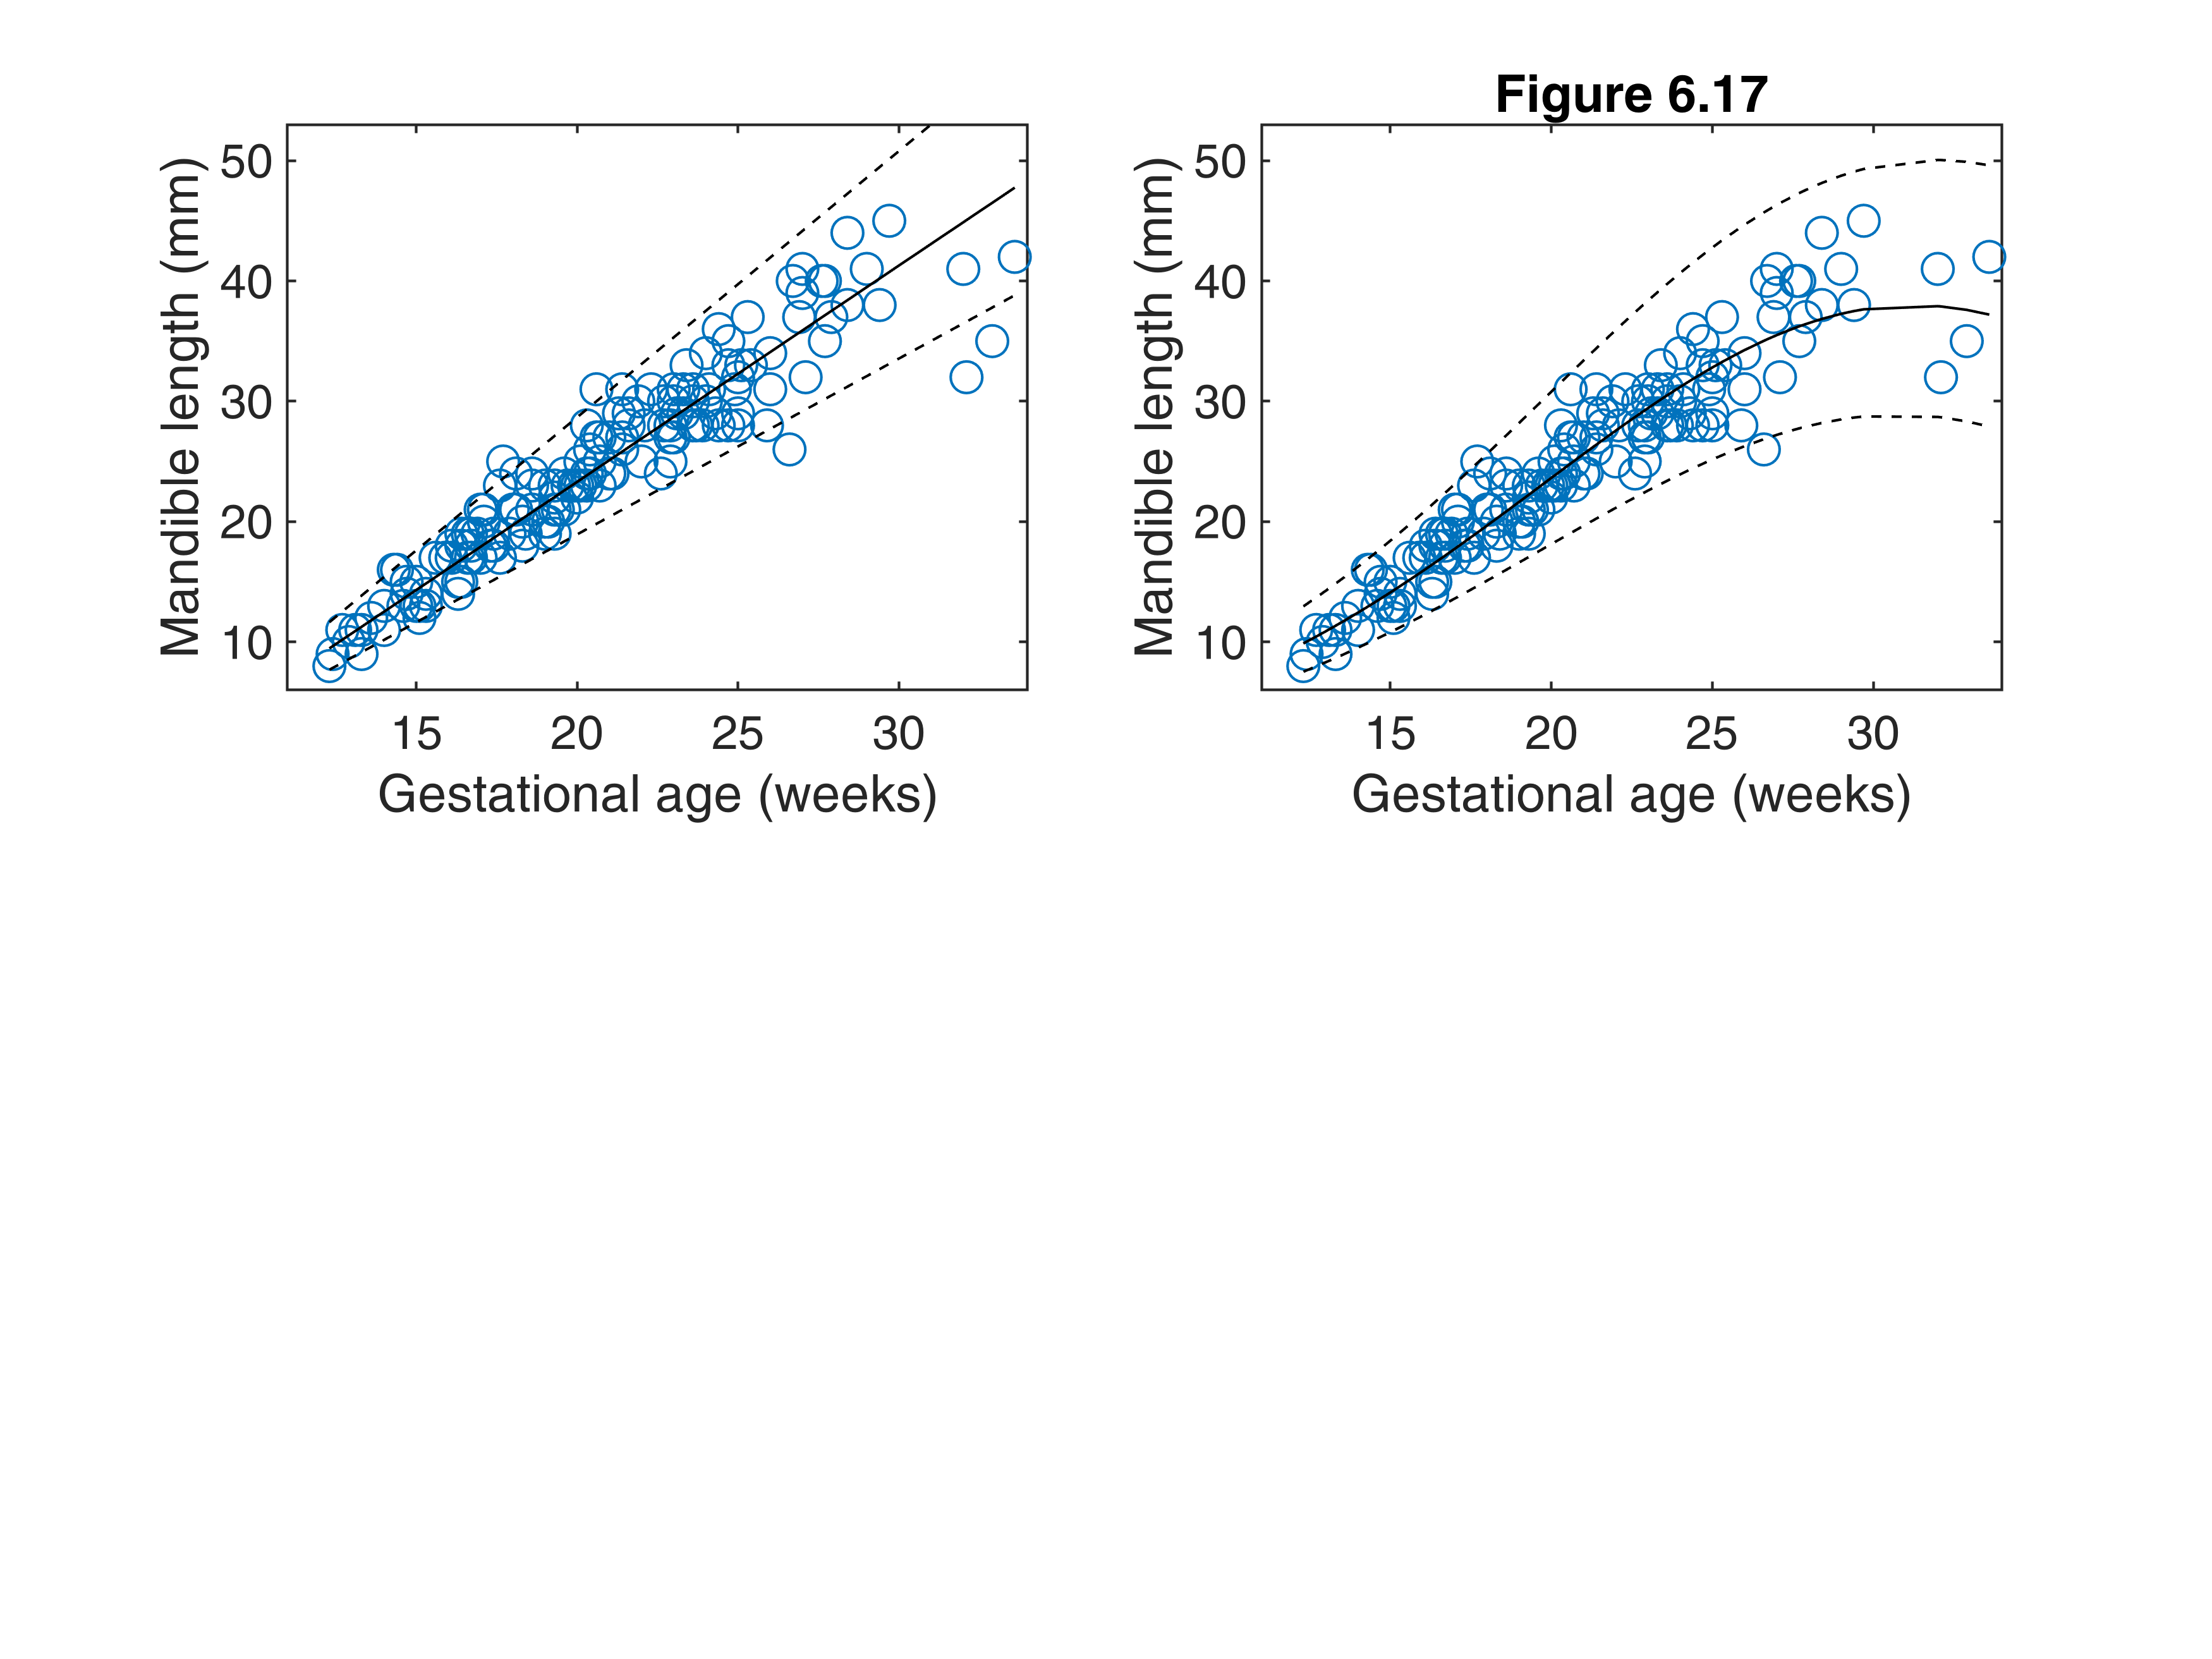

In [2]:
subplot(2,2,1)

% Transform both sides model
out=tBothSides(y, X);

% Confidence interval
plot(X,y,'o')
hold('on')
% Use la =0
laest=0;
confquant=2.58; % 99 per cent conf int

yhattra=normBoxCox(out.yhat,1,laest,'Jacobian',false);
upConfInt= normBoxCox(yhattra+confquant*out.scale,1,laest,'inverse',true,'Jacobian',false);
lowConfInt= normBoxCox(yhattra-confquant*out.scale,1,laest,'inverse',true,'Jacobian',false);
[Xsor,indXsor]=sort(X);
% Plot of fitted values
plot(Xsor,out.yhat(indXsor),'k-')
% Plot the upper confidence band
plot(Xsor,upConfInt(indXsor),'k--')
% Plot the lower confidence band
plot(Xsor,lowConfInt(indXsor),'k--')
xlabel('Gestational age (weeks)')
ylabel('Mandible length (mm)')
xlimx=[11 34];
ylimy=[6 53];
xlim(xlimx)
ylim(ylimy)

% Right hand panel: logarithmic Box-Cox with a quadratic model
subplot(2,2,2)
Xwithq=[X X.^2];
xlimx=[11 34];
ylimy=[6 53];

MLfit_without = fitlm(Xwithq,log(y));
[ypred,yci]=predict(MLfit_without,Xwithq,'Simultaneous',false,'Alpha',0.01,'Prediction','observation');
% close all
hold('on')
plot(Xwithq(:,1),y,'o')
plot(Xwithq(:,1), exp(ypred),'k-')
plot(Xwithq(:,1), exp(yci),'k--')
xlabel('Gestational age (weeks)')
ylabel('Mandible length (mm)')
box('on')
xlim(xlimx)
ylim(ylimy)

title('Figure 6.17')
set(gcf,"Name",'Figure 6.17')

In [3]:

if prin==1
    % print to postscript
    print -depsc figsBS\ML1.eps;
end

%InsideREADME